Exploratory Data Analysis

In [ ]:
!pip install empiricaldist
import empiricaldist as emp

  Created wheel for empiricaldist: filename=empiricaldist-0.6.1-cp37-none-any.whl size=10629 sha256=b6ada3c40b60bbe74c9a2d80c496692acbb224dfa670a45dd1ba0c347a7923ca
  Stored in directory: /root/.cache/pip/wheels/9d/93/b1/92742aa428b2a83dd6aa6ece18a908f7e38c15895b1c37a462
Successfully built empiricaldist


Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load library

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Load the csv file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AH_Monthly_provisional_counts_of_deaths_by_age_group__sex__and_race_ethnicity_for_select_causes_of_death (1).csv", index_col=0)
df.head()

,Date.Of.Death.Year,Date.Of.Death.Month,Sex,Race.Ethnicity,AgeGroup,AllCause,NaturalCause,Septicemia..A40.A41.,Malignant.neoplasms..C00.C97.,Diabetes.mellitus..E10.E14.,Alzheimer.disease..G30.,Influenza.and.pneumonia..J09.J18.,Chronic.lower.respiratory.diseases..J40.J47.,Other.diseases.of.respiratory.system..J00.J06.J30.J39.J67.J70.J98.,Nephritis..nephrotic.syndrome.and.nephrosis..N00.N07.N17.N19.N25.N27.,Symptoms..signs.and.abnormal.clinical.and.laboratory.findings..not.elsewhere.classified..R00.R99.,Diseases.of.heart..I00.I09.I11.I13.I20.I51.,Cerebrovascular.diseases..I60.I69.,COVID.19..U071..Multiple.Cause.of.Death.,COVID.19..U071..Underlying.Cause.of.Death.,Start.Date,End.Date,Jurisdiction.of.Occurrence
1,2019,1,F,Hispanic,0-4 years,182.0,162.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.0,NaN,0.0,0.0,0.0,01/01/2019,01/31/2019,United States
2,2019,1,F,Hispanic,5-14 years,44.0,28.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/01/2019,01/31/2019,United States
3,2019,1,F,Hispanic,15-24 years,122.0,45.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,01/01/2019,01/31/2019,United States
4,2019,1,F,Hispanic,25-34 years,198.0,100.0,NaN,29.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,01/01/2019,01/31/2019,United States
5,2019,1,F,Hispanic,35-44 years,334.0,260.0,NaN,96.0,NaN,0.0,11.0,NaN,NaN,NaN,NaN,25.0,10.0,0.0,0.0,01/01/2019,01/31/2019,United States


In [ ]:
df['NaturalCause'].value_counts().sort_index()

0.0        13
10.0       14
11.0       14
12.0       15
13.0       10
           ..
41621.0     1
43113.0     1
43130.0     1
48025.0     1
52054.0     1
Name: NaturalCause, Length: 1288, dtype: int64

In [ ]:

df['NaturalCause'].describe()
df.NaturalCause.isnull().sum()

283

**Univariate**

histrogram for Natural cause 

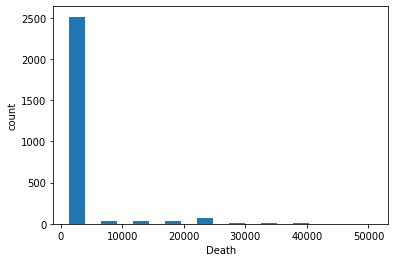

In [ ]:
plt.hist(df.NaturalCause, rwidth = 0.5)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 


from the above graph we can see that a little right skewness is observed. Also we can see that an unusual observions around 25000 death count.

Removing Skewness of the column NaturalCause 

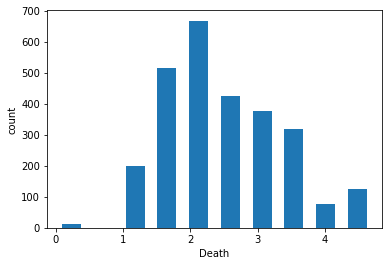

In [ ]:
l_NaturalCause = df.NaturalCause.dropna()
l_NaturalCause = np.log10(l_NaturalCause+1)
plt.hist(l_NaturalCause, rwidth = 0.6)
plt.xlabel('Death')
plt.ylabel('count')
plt.show() 

**distibution of data**

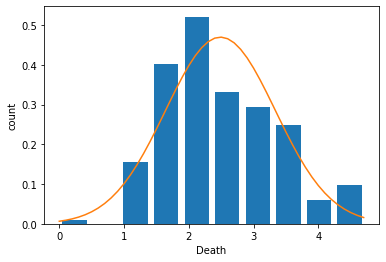

In [ ]:
from scipy.stats import norm

plt.hist(l_NaturalCause, rwidth = 0.8, density=True)
plt.xlabel('Death')
plt.ylabel('count')

rng = np.arange(l_NaturalCause.min(), l_NaturalCause.max(),0.1)
plt.plot(rng,norm.pdf(rng, l_NaturalCause.mean(), l_NaturalCause.std()))

for the clear distrubiton of the data i draw the curve line to know the data variations due to natural cause in number of death

**for the outliers in natural cause**

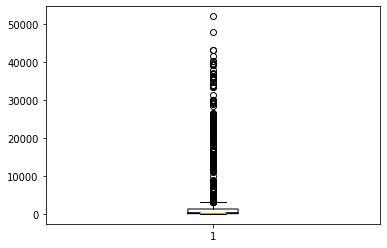

In [ ]:
plt.boxplot(df.NaturalCause.dropna(), 1)
plt.show()

In the above graph we can  see that there are many outliers in dataset

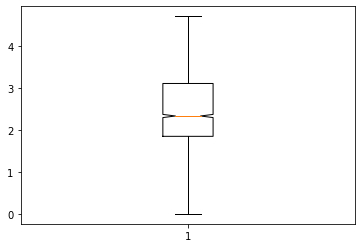

In [ ]:
plt.boxplot(l_NaturalCause, 1)
plt.show()

from the above logarithm box plot of natural cause diseases,it is clrealy seen that no outliers in the data.

plotting bar graph for categorical

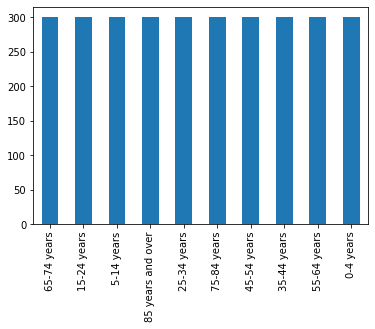

In [ ]:
df['AgeGroup'].value_counts().plot.bar()

by observing above bar graph it is clearly seen that each age group has similar death cause by various diseases.

**Bivariate**

finding cdf for age group

In [ ]:
df['Sex'].describe()
All_Cause = df['NaturalCause'].dropna()
All_Cause.describe()


count     2717.000000
mean      2194.944056
std       5945.745418
min          0.000000
25%         70.000000
50%        216.000000
75%       1294.000000
max      52054.000000
Name: NaturalCause, dtype: float64

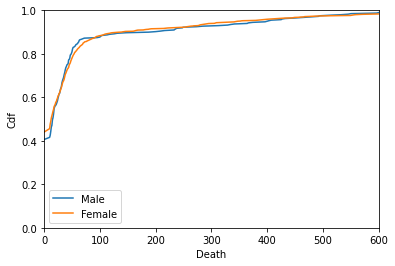

In [ ]:
male = df['Sex'] == 'M'
All_Cause = df['Influenza.and.pneumonia..J09.J18.']
male_death = All_Cause[male]
female_death = All_Cause[~male]
emp.Cdf.from_seq(male_death).plot(label = 'Male')
emp.Cdf.from_seq(female_death).plot(label ='Female')
plt.xlabel('Death')
plt.ylabel('Cdf')
plt.legend()
plt.axis([0,600,0,1])
plt.show()

from the above graph both male and female sex categories are almost parellel to each other. where we can see a tremondous increment are observed near 100 death count towords cdf o.4 to 0.9.

one categorical and 1 numeric variable

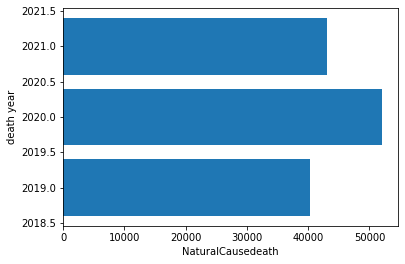

In [ ]:
from empiricaldist import Pmf
plt.barh(df['Date.Of.Death.Year'], df['NaturalCause'])
# Label the axes
plt.xlabel('NaturalCausedeath')
plt.ylabel('death year')
plt.show()

from the above visulization we can easily see that more than 50000 deaths are identified in the year of 2020 and  its the highest among all year. 

**realtionship between natural cause and chronic diseases**

LinregressResult(slope=0.05948142118189945, intercept=-16.54193813580744, rvalue=0.9459405734311281, pvalue=0.0, stderr=0.0005031520020455584)


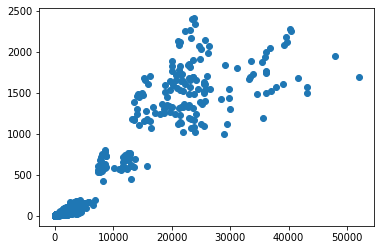

In [ ]:
from scipy.stats import linregress

subset = df.dropna(subset=['NaturalCause', 'Chronic.lower.respiratory.diseases..J40.J47.'])
xs = subset['NaturalCause']
ys = subset['Chronic.lower.respiratory.diseases..J40.J47.']
res = linregress(xs,ys)
print(res)
plt.scatter(df['NaturalCause'],df['Chronic.lower.respiratory.diseases..J40.J47.'])
plt.show()


from the above plot we can see that there is a positive relationship. and we can say that from 100  people only 5 people die due to this diseases.